In [39]:
import pandas as pd
import numpy as np

In [40]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
med_df = pd.read_csv('F:/Codes/Python/ML/ML-fundamentals/data/medical-insurance/medical.csv')

In [43]:
smoker_num = med_df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
med_df['smoker_num'] = smoker_num

In [44]:
def rmse(target_val, predicted_val):
    return np.sqrt(np.mean(np.square(target_val - predicted_val)))

In [45]:
model = LinearRegression()

In [46]:
non_smoker_df = med_df[med_df.smoker == 'no']
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targets.shape :', targets.shape)

inputs.shape : (1064, 1)
targets.shape : (1064,)


In [47]:
model.fit(inputs, targets)


LinearRegression()

In [48]:
model.predict(np.array([[23],[40],[70]]))

C:\Users\Sanjai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  8598.53595668, 16616.00334162])

In [49]:
predictions = model.predict(inputs)

In [50]:
print(rmse(targets, predictions))
print(model.coef_,model.intercept_)

4662.505766636395
[267.24891283] -2091.4205565650864


In [51]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

RMSE Loss:  4662.505766636395


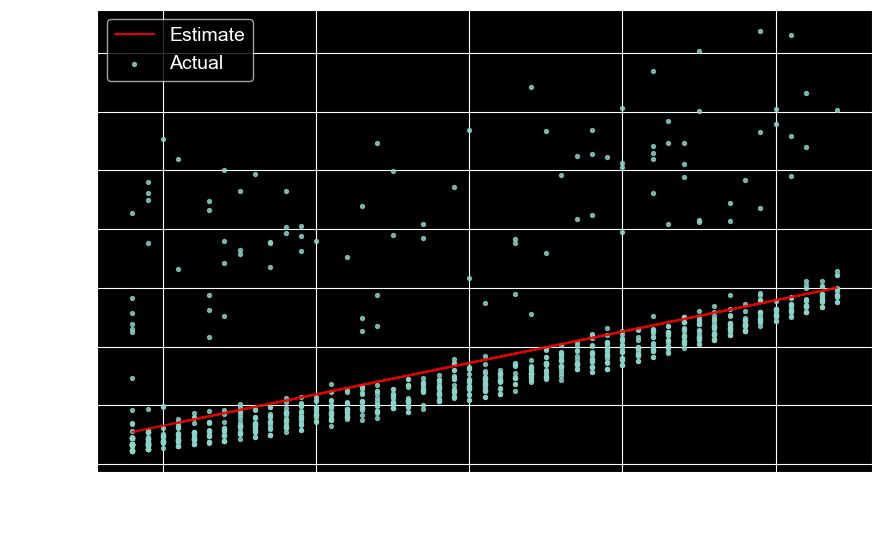

In [52]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)
    
try_parameters(model.coef_,model.intercept_)

In [53]:
smokers_df = med_df[med_df.smoker == 'yes']
inputs_smokers = smokers_df[['age']]
targets_smokers = smokers_df.charges

In [54]:
model.fit(inputs_smokers,targets_smokers)

LinearRegression()

In [55]:
predictions = model.predict(inputs_smokers)

In [56]:
rmse(targets_smokers, predictions)

np.float64(10711.00334810241)

In [57]:
model.coef_, model.intercept_

(array([305.23760211]), np.float64(20294.12812691597))

RMSE Loss:  10711.00334810241


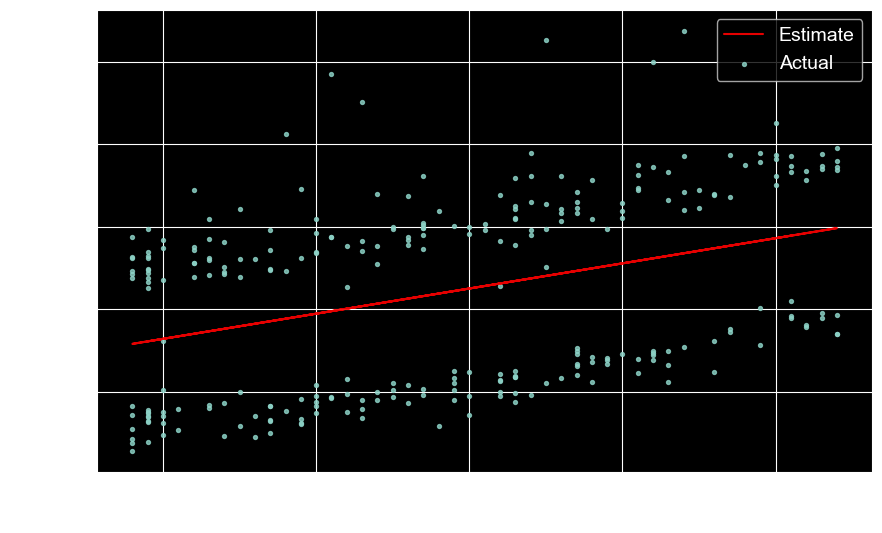

In [58]:
def try_parameters(w, b):
    ages = smokers_df.age
    target = smokers_df.charges
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)
    
try_parameters(model.coef_,model.intercept_)

<b> Linear Regression Using Multiple Variables: </b> <br>
so now we going to add another parameter to our model on top of the existing one to see how good or bad our model performs. In this case we are going to add 'BMI' as a parameter to the model. <br>
<b>new relationsip with charges:</b> <br>
<i>charges = w1 X age + w2 X bmi + b</i>

In [59]:
inputs = non_smoker_df[['age', 'bmi']]
targets = non_smoker_df.charges

model.fit(inputs, targets)
predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("RMSE Loss: ", loss)

RMSE Loss:  4662.3128354612945


In [60]:
non_smoker_df.charges.corr(non_smoker_df.age), non_smoker_df.charges.corr(non_smoker_df.bmi)

(np.float64(0.627946783766419), np.float64(0.0840365431283327))

In [61]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

So as we can see the change in RMSE value (~$0.20), BMI is not a strong variable to predcit the charges especially with the non-smokers. 'bmi' also has a very weak coorelation with charges<b>(0.0840)</b> as compared to 'age' <b>(0.6279)</b>.<br> and also the weight of 'bmi' <i>W2</i> is very less compared to <i>W1</i>.

In [62]:
model = LinearRegression().fit(non_smoker_df[['bmi']], non_smoker_df.charges)
predictions = model.predict(non_smoker_df[['bmi']])
loss = rmse(non_smoker_df.charges, predictions)
print("RMSE Loss: ", loss)

RMSE Loss:  5969.772531913293


so here as we can see the RMSE loss (5969.7725) is higher than the previous one(4662.5057), which means that the model is not as good as the previous one.

In [65]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

Now we will add another feature, `children`, to our model:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [68]:
non_smoker_df.charges.corr(non_smoker_df.children)

np.float64(0.13892870453542183)

In [73]:
graph = px.strip(non_smoker_df, x='children', y='charges', color='smoker')
graph.show()

as we can see here there is somewhat linear relationship between the number of children and the charges, but it is not very strong.

In [74]:
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("RMSE Loss: ", loss)

RMSE Loss:  4608.470405038247


as we can see there is a not so strong correlation between the number of children and the charges, but it is still little higher than the correlation between the bmi and the charges.

<b>We will try the model on the smokers dataset as well</b>

In [75]:
inputs_smokers, targets_smokers = smokers_df[['age', 'bmi', 'children']], smokers_df.charges

model_smokers = LinearRegression().fit(inputs_smokers, targets_smokers)
predictions_smokers = model_smokers.predict(inputs_smokers)

loss_smokers = rmse(targets_smokers, predictions_smokers)
print("RMSE Loss Smokers: ", loss_smokers)

RMSE Loss Smokers:  5718.202480524154


In [ ]:
so as we can see, the model for smokers is worse than the one for non-smokers